In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv('https://raw.githubusercontent.com/afaiyaz006/CSE-404-ASSIGNMENT/main/MultiVariable_Linear_Regression/ConcreteStrengthData.csv')

The information given in the dataset:

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [15]:
data

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


array([[<AxesSubplot:title={'center':'CementComponent '}>,
        <AxesSubplot:title={'center':'BlastFurnaceSlag'}>,
        <AxesSubplot:title={'center':'FlyAshComponent'}>],
       [<AxesSubplot:title={'center':'WaterComponent'}>,
        <AxesSubplot:title={'center':'SuperplasticizerComponent'}>,
        <AxesSubplot:title={'center':'CoarseAggregateComponent'}>],
       [<AxesSubplot:title={'center':'FineAggregateComponent'}>,
        <AxesSubplot:title={'center':'AgeInDays'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

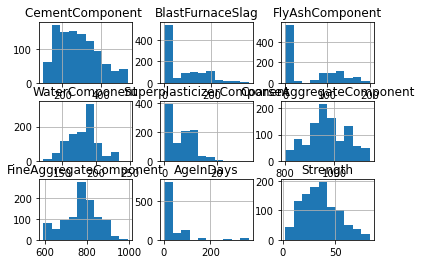

In [17]:
data.hist()

Applying log transformation because some features follows a power distribution need to make the distribution of thoose features to normal.

In [18]:
data['BlastFurnaceSlag']=data['BlastFurnaceSlag'].replace(0,0.1)
data['FlyAshComponent']=data['FlyAshComponent'].replace(0,0.1)
data['SuperplasticizerComponent']=data['SuperplasticizerComponent'].replace(0,0.1)
data['AgeInDays']=data['AgeInDays'].replace(0,0.1)

In [19]:
data['AgeInDays']=data['AgeInDays'].transform(lambda x:np.log2(x))
data['BlastFurnaceSlag']=data['BlastFurnaceSlag'].transform(lambda x:np.log2(x))
data['FlyAshComponent']=data['FlyAshComponent'].transform(lambda x:np.log2(x))
data['SuperplasticizerComponent']=data['SuperplasticizerComponent'].transform(lambda x:np.log2(x))

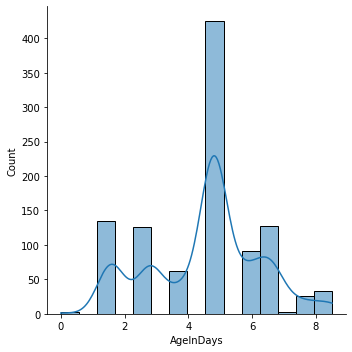

In [20]:
sns.displot(data['AgeInDays'],kde=True)

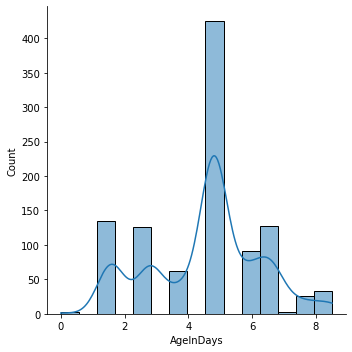

In [21]:
sns.displot(data['AgeInDays'],kde=True)

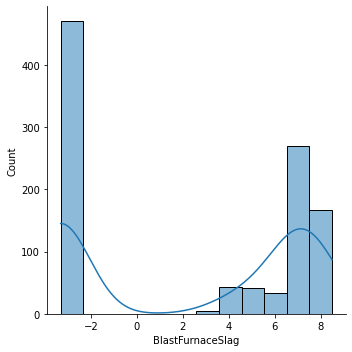

In [22]:
sns.displot(data['BlastFurnaceSlag'],kde=True)

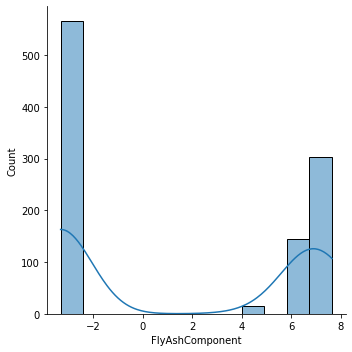

In [23]:
sns.displot(data['FlyAshComponent'],kde=True)

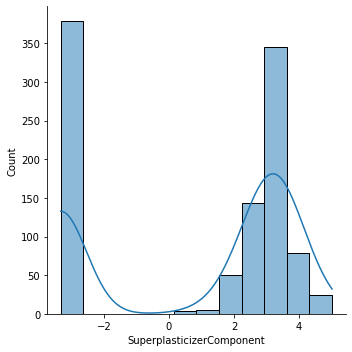

In [24]:
sns.displot(data['SuperplasticizerComponent'],kde=True)

we can see the distribution of all the features are now normal approximately

In [25]:
dataX=data.iloc[:,0:8]

In [26]:
dataY=data.iloc[:,8]

<AxesSubplot:>

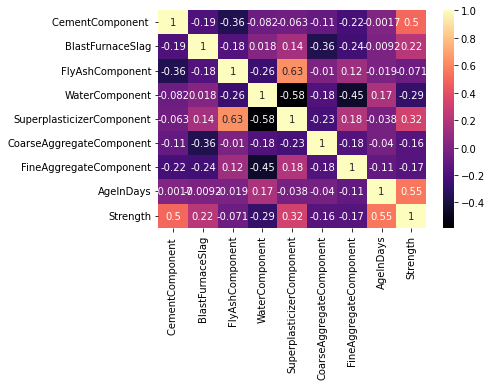

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [28]:
dataY

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [29]:
column=dataX.columns

Lets plot the relationship between all the columns vs strength

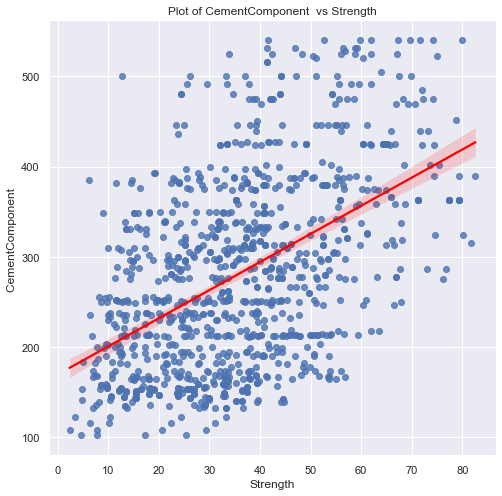

In [30]:


sns.set(rc={'figure.figsize':(8,8)})

sns.regplot(x="Strength", y=column[0], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[0]} vs Strength")

plt.show()


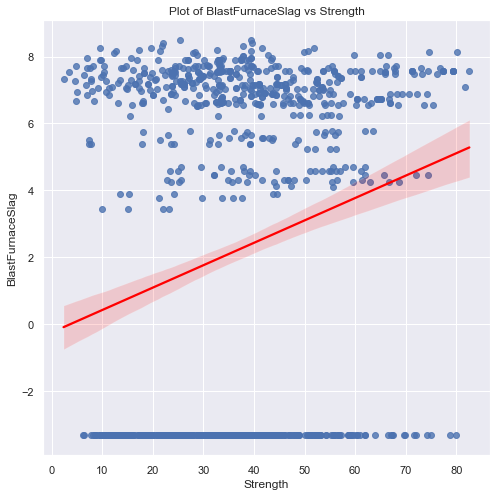

In [31]:
sns.regplot(x="Strength", y=column[1], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[1]} vs Strength")

plt.show()

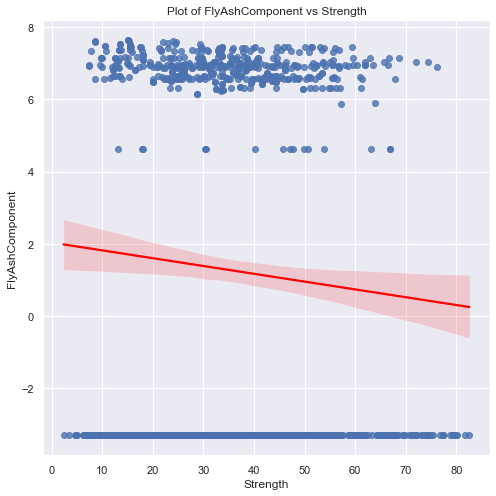

In [32]:
sns.regplot(x="Strength", y=column[2], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[2]} vs Strength")

plt.show()

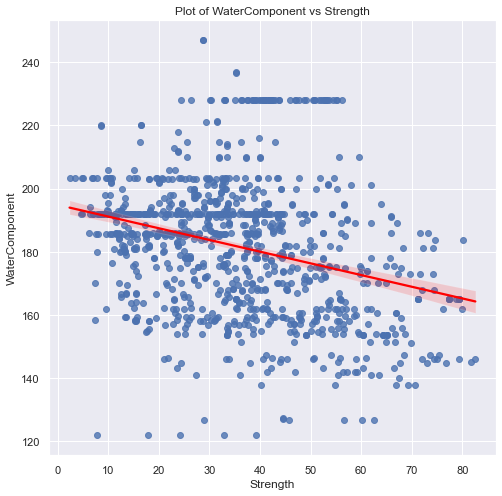

In [33]:
sns.regplot(x="Strength", y=column[3], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[3]} vs Strength")

plt.show()

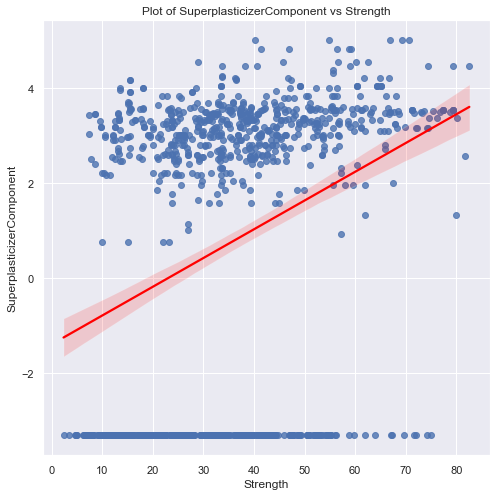

In [34]:
sns.regplot(x="Strength", y=column[4], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[4]} vs Strength")

plt.show()

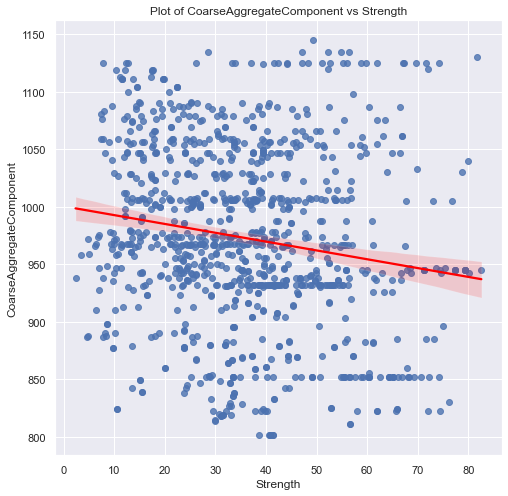

In [35]:
sns.regplot(x="Strength", y=column[5], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[5]} vs Strength")

plt.show()

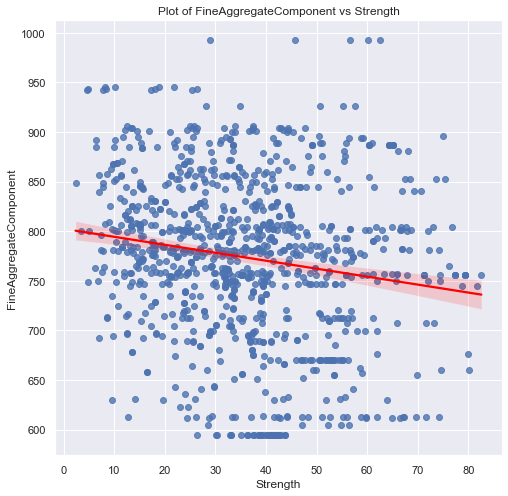

In [36]:
sns.regplot(x="Strength", y=column[6], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[6]} vs Strength")

plt.show()

In [37]:
print(column)

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
      dtype='object')


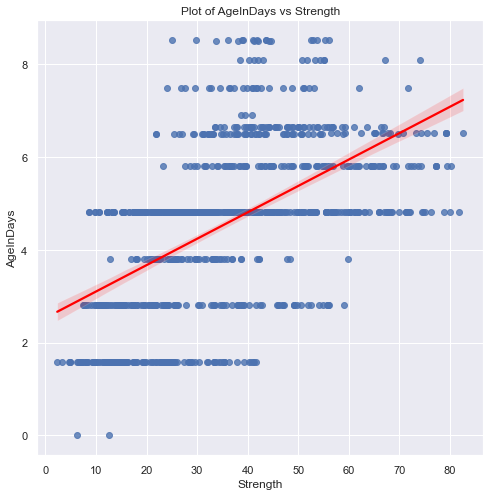

In [38]:
sns.regplot(x="Strength", y=column[7], data=data, line_kws={'color': 'red'})

plt.title(f"Plot of {column[7]} vs Strength")

plt.show()

In [39]:
X=np.asarray(dataX)
y=np.asarray([dataY]).T
print(X.shape)
print(y.shape)

(1030, 8)
(1030, 1)


### With Sklearn 

In [40]:
from sklearn import preprocessing
transformer = preprocessing.StandardScaler().fit(X)
X=transformer.transform(X)
transformer = preprocessing.StandardScaler().fit(y)  
y=transformer.transform(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(f"Using SciKit Learn LinearRegression().fit(X_train,y_train)")
y_predict_train=reg.predict(X_train)
y_predict_test=reg.predict(X_test)
sklearn_model_prediction=y_predict_test
sklearn_model_prediction_train=y_predict_train

rmse_error_train=np.sqrt(mean_squared_error(y_predict_train,y_train))
rmse_error_test=np.sqrt(mean_squared_error(y_predict_test,y_test))

mse_error_train=mean_squared_error(y_predict_train,y_train)
mse_error_test=mean_squared_error(y_predict_test,y_test)

mae_error_train=mean_absolute_error(y_predict_train,y_train)
mae_error_test=mean_absolute_error(y_predict_test,y_test)

print(f"Coeficients:\n {reg.coef_}")
print(f"Intercept:\n {reg.intercept_}")
print(f"Train Data:\n RMSE: {rmse_error_train} \n MSE: {mse_error_train} \n MAE: {mae_error_train} \n R2 Score: {reg.score(X_train,y_train)}")
print(f"Test Data:\n RMSE: {rmse_error_test}  \n MSE: {mse_error_test} \n MAE: {mae_error_test} \n R2 Score: {reg.score(X_test,y_test)}")

rmse_sklearn_model_train_data=rmse_error_train
rmse_sklearn_model_test_data=rmse_error_test

mse_sklearn_train_data=mse_error_train
mse_sklearn_test_data=rmse_error_test

mae_sklearn_train_data=mae_error_train
mae_sklearn_test_data=mae_error_test

r2_score_sklearn_model_train_data=r2_score(y_train,y_predict_train)
r2_score_sklearn_model_test_data=r2_score(y_test,y_predict_test)

Using SciKit Learn LinearRegression().fit(X_train,y_train)
Coeficients:
 [[ 0.52895463  0.28053768 -0.00245306 -0.303368    0.17654096 -0.01420721
  -0.08252931  0.59449535]]
Intercept:
 [0.00394073]
Train Data:
 RMSE: 0.44037031281404315 
 MSE: 0.19392601240793822 
 MAE: 0.3412730243701301 
 R2 Score: 0.8115427029423528
Test Data:
 RMSE: 0.43628376560363163  
 MSE: 0.19034352412928457 
 MAE: 0.33658203752653465 
 R2 Score: 0.7842942923414696


<h1> Without using sklearn</h1>

The linear regression equation for multiple variables is given by:

\begin{equation}
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
\end{equation}

where $y$ is the dependent variable, $x_1, x_2, \ldots, x_n$ are the independent variables, and $\theta_0, \theta_1, \theta_2, \ldots, \theta_n$ are the coefficients for the independent variables.

The cost function for multi-variable linear regression is typically the mean squared error (MSE), which can be written as:

\begin{equation}
J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
\end{equation}

where $\boldsymbol{\theta}$ is the vector of coefficients, $m$ is the number of training examples, $y^{(i)}$ is the actual value of the dependent variable for the $i$th training example, and $\hat{y}^{(i)}$ is the predicted value of the dependent variable for the $i$th training example.

The gradient descent algorithm updates the coefficients iteratively using the following equation:

\begin{equation}
\theta_j = \theta_j - \alpha \frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j}
\end{equation}

where $\alpha$ is the learning rate and $\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j}$ is the partial derivative of the cost function with respect to the $j$th coefficient.

The partial derivative can be calculated using the chain rule:

\begin{equation}
\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}
\end{equation}

where $x_j^{(i)}$ is the value of the $j$th independent variable for the $i$th training example.

Using this equation, we can update the coefficients in each iteration until we reach a minimum of the cost function. The algorithm stops when either the cost function reaches a certain threshold or a maximum number of iterations is reached.

In summary, multi-variable linear regression uses a linear equation to model the relationship between multiple independent variables and a dependent variable, and the gradient descent algorithm is used to find the coefficients that minimize the mean squared error cost function, with the coefficient vector represented by $\boldsymbol{\theta}$.

In [44]:
class LinearRegressionFromScratch:
    def __init__(self,X,y):
        self.X=X
        self.y=y
        self.coef=np.asarray([np.random.rand() for i in range(X.shape[1])])
        self.intercept=1
        self.hypothesis=lambda x,theta,intercept:np.dot(x,theta)+intercept
        self.cost=float("inf")
        self.m=X.shape[0]
        self.costs=[]
    
    def predict(self,X):
        return self.hypothesis(X,self.coef,self.intercept)
    
    def error(self,X,y_test):
        y_predict=self.hypothesis(X,self.coef,self.intercept)
        error=(1/(2*self.m))*np.sum(np.square(y_predict-y_test))
        return error
    
    
    def gradient_descent(self,epoch=100,learning_rate=0.3):
        for i in range(0,epoch):
            # this loop updates the coeefficients
            for j in range(0,len(self.coef)):
                
                x=self.X
                coef=self.coef.reshape(-1,1)
                xj=self.X[:,j].reshape(-1,1)
                intercept=self.intercept
                y=self.y
                hx=self.hypothesis(x,coef,intercept)
                hx_minus_y=(hx-y).reshape(1,-1)
                m=self.m
                #update the jth coeefficient
                self.coef[j]=self.coef[j]-learning_rate*(1/m)*np.sum(np.dot(hx_minus_y,xj))
                
            x=self.X
            coef=self.coef.reshape(-1,1)
            hx=self.hypothesis(x,coef,intercept)
            hx_minus_y=(hx-y).reshape(1,-1)
            #updating the intercept
            self.intercept=self.intercept-learning_rate*(1/m)*np.sum(hx_minus_y)
            #calculating the cost after updating the coefficients and intercept
            cost=(1/(2*m))*np.sum(np.square(self.hypothesis(x,coef,intercept)-y))
            self.costs.append(cost)
            print(f"Epoch: {i} Cost: {cost}")

In [45]:
lgs=LinearRegressionFromScratch(X_train,y_train)

In [46]:
lgs.gradient_descent()

Epoch: 0 Cost: 0.8997253059161885
Epoch: 1 Cost: 0.5118075471701071
Epoch: 2 Cost: 0.3243314062990818
Epoch: 3 Cost: 0.2320826219926509
Epoch: 4 Cost: 0.18573089816609328
Epoch: 5 Cost: 0.16169315366834322
Epoch: 6 Cost: 0.14859695206493803
Epoch: 7 Cost: 0.1409285378741123
Epoch: 8 Cost: 0.13600115747430372
Epoch: 9 Cost: 0.13249772498681564
Epoch: 10 Cost: 0.12976739382032398
Epoch: 11 Cost: 0.12748484022275913
Epoch: 12 Cost: 0.12548463432691273
Epoch: 13 Cost: 0.12368040368990527
Epoch: 14 Cost: 0.12202520404773073
Epoch: 15 Cost: 0.12049199192384179
Epoch: 16 Cost: 0.11906394399735776
Epoch: 17 Cost: 0.11772962182518375
Epoch: 18 Cost: 0.11648053307568285
Epoch: 19 Cost: 0.1153098851368783
Epoch: 20 Cost: 0.11421193624371824
Epoch: 21 Cost: 0.1131816487218547
Epoch: 22 Cost: 0.11221449676432511
Epoch: 23 Cost: 0.11130635447544061
Epoch: 24 Cost: 0.11045342647868797
Epoch: 25 Cost: 0.10965220173322576
Epoch: 26 Cost: 0.10889942047983008
Epoch: 27 Cost: 0.10819204896993923
Epoch: 28

In [47]:
epochs=[i for i in range(0,100)]
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost')

def animate(i):
    ax.plot(epochs[:i], lgs.costs[:i], color='blue')
    
ani = FuncAnimation(fig, animate, frames=len(epochs), interval=100)
plt.close()
HTML(ani.to_jshtml())


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Using my own implementation of linear regression")
y_predict_train=lgs.predict(X_train)
y_predict_test=lgs.predict(X_test)
my_model_prediction=y_predict_test
my_model_prediction_train=y_predict_train
rmse_error_train=np.sqrt(mean_squared_error(y_predict_train,y_train))
rmse_error_test=np.sqrt(mean_squared_error(y_predict_test,y_test))

mse_error_train=mean_squared_error(y_predict_train,y_train)
mse_error_test=mean_squared_error(y_predict_test,y_test)

mae_error_train=mean_absolute_error(y_predict_train,y_train)
mae_error_test=mean_absolute_error(y_predict_test,y_test)

print(f"Coeficients:\n {lgs.coef}")
print(f"Intercept:\n {lgs.intercept}")
print(f"Train Data:\n RMSE: {rmse_error_train} \n MSE: {mse_error_train} \n MAE: {mae_error_train} \n R2 Score: {r2_score(y_train,y_predict_train)}")
print(f"Test Data:\n RMSE: {rmse_error_test}  \n MSE: {mse_error_test} \n MAE: {mae_error_test} \n R2 Score: {r2_score(y_test,y_predict_test)}")

rmse_my_model_train_data=rmse_error_train
rmse_my_model_test_data=rmse_error_test

mse_my_model_train_data=mse_error_train
mse_my_model_test_data=rmse_error_test

mae_my_model_train_data=mae_error_train
mae_my_model_test_data=mae_error_test

r2_score_my_model_train_data=r2_score(y_train,y_predict_train)
r2_score_my_model_test_data=r2_score(y_test,y_predict_test)



Using my own implementation of linear regression
Coeficients:
 [ 0.55048462  0.30215995  0.00792415 -0.2731021   0.1876329   0.01176946
 -0.055637    0.59456028]
Intercept:
 0.004139087973060021
Train Data:
 RMSE: 0.4407044039232854 
 MSE: 0.19422037163737832 
 MAE: 0.34139186120801185 
 R2 Score: 0.8112566446459156
Test Data:
 RMSE: 0.43526616974614957  
 MSE: 0.1894566385254839 
 MAE: 0.33643595479312005 
 R2 Score: 0.785299350368293


<AxesSubplot:xlabel='Y Original(Train Data)', ylabel='Y Predict (Train Data)'>

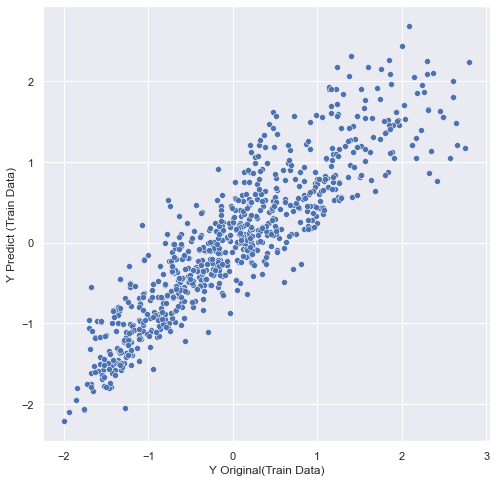

In [49]:

y_train_plot=pd.DataFrame({"Y Predict (Train Data)":y_predict_train.squeeze(), "Y Original(Train Data)":y_train.squeeze()})
sns.scatterplot(data=y_train_plot,x="Y Original(Train Data)",y="Y Predict (Train Data)")

[Text(0.5, 1.0, 'Prediction vs real')]

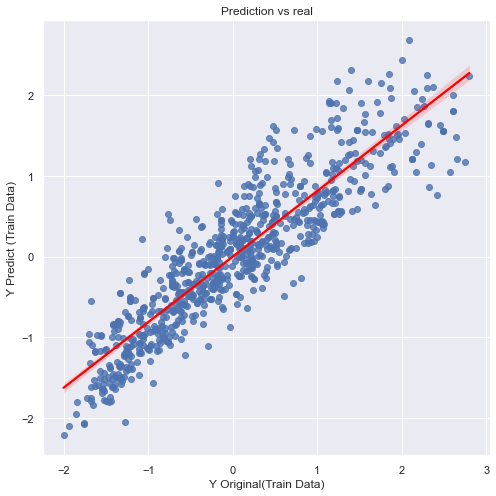

In [50]:
sns.regplot(data=y_train_plot,x="Y Original(Train Data)",y="Y Predict (Train Data)",line_kws={'color':'red'}).set(title='Prediction vs real')








<AxesSubplot:xlabel='Y Original(Test Data)', ylabel='Y Predict (Test Data)'>

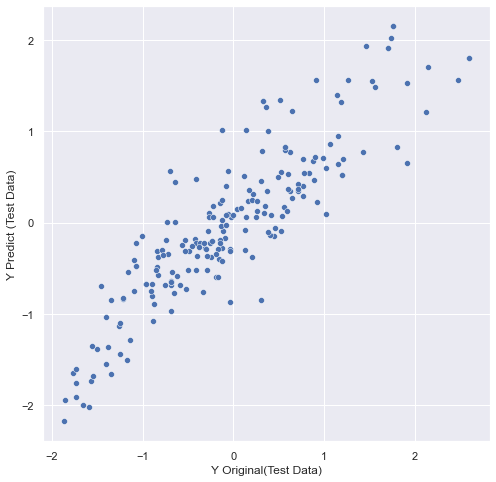

In [51]:
import matplotlib.pyplot as plt

y_test_plot=pd.DataFrame({"Y Predict (Test Data)":y_predict_test.squeeze(),"Y Original(Test Data)":y_test.squeeze()})
sns.scatterplot(data=y_test_plot,x="Y Original(Test Data)",y="Y Predict (Test Data)")

comparison between my Linear Regression model and Sci-kit learn

[Text(0.5, 1.0, 'Prediction vs real')]

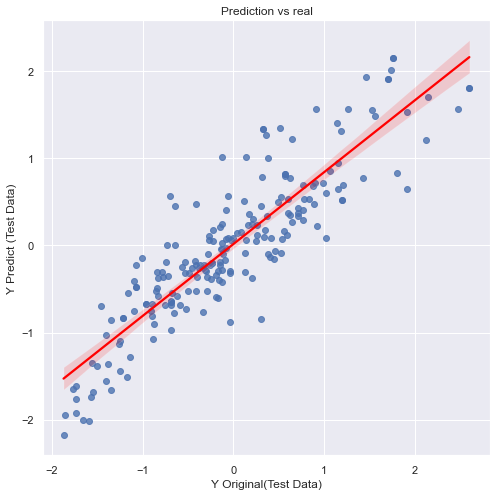

In [52]:
sns.regplot(data=y_test_plot,x="Y Original(Test Data)",y="Y Predict (Test Data)",line_kws={'color':'red'}).set(title='Prediction vs real')



In [53]:
comparison_df = pd.DataFrame({'Factor':[
                                    "RMSE(Train data)",
                                    "RMSE(Test data)",
                                    "MSE(Train data)",
                                    "MSE(Test data)",
                                    "MAE(Train data)",
                                    "MAE(Test data)",
                                    "r2 score(Train data)",
                                    "r2 score(Test data)"
                                ],
    
    
                                'My Own Implementation': [
                                  rmse_my_model_train_data,
                                  rmse_my_model_test_data,
                                  mse_my_model_train_data,
                                  mse_my_model_test_data,
                                  mae_my_model_train_data,
                                  mae_my_model_test_data,
                                  r2_score_my_model_train_data,
                                  r2_score_my_model_test_data],
                              
                              'Sci Kit learn Implementaion':[
                                  rmse_sklearn_model_train_data,
                                  rmse_sklearn_model_test_data,
                                  mse_sklearn_train_data,
                                  mse_sklearn_test_data,
                                  mae_sklearn_train_data,
                                  mae_sklearn_test_data,
                                  r2_score_sklearn_model_train_data,
                                  r2_score_sklearn_model_test_data
                              ]
                   })


In [54]:
comparison_df.iloc[0:6,:]

,Factor,My Own Implementation,Sci Kit learn Implementaion
0,RMSE(Train data),0.440704,0.440370
1,RMSE(Test data),0.435266,0.436284
2,MSE(Train data),0.194220,0.193926
3,MSE(Test data),0.435266,0.436284
4,MAE(Train data),0.341392,0.341273
5,MAE(Test data),0.336436,0.336582


In [55]:
comparison_df.iloc[6:,:]

,Factor,My Own Implementation,Sci Kit learn Implementaion
6,r2 score(Train data),0.811257,0.811543
7,r2 score(Test data),0.785299,0.784294


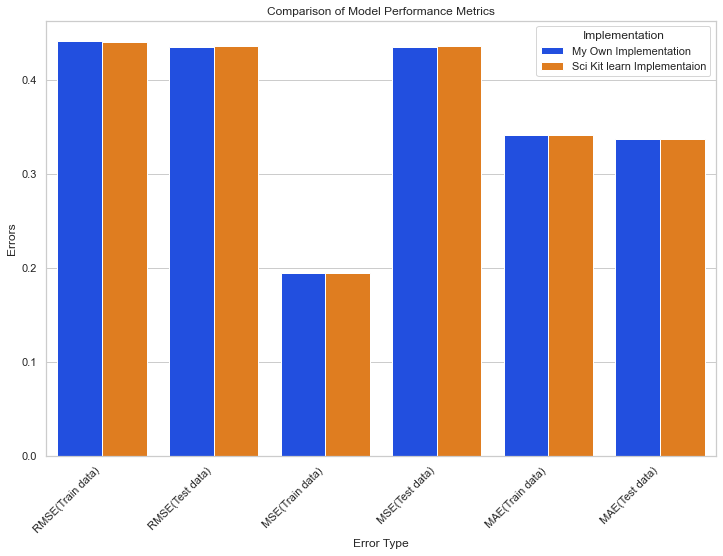

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# melt the dataframe to long format
melted_df = pd.melt(comparison_df.iloc[0:6,:], id_vars='Factor', var_name='Implementation', value_name='Score')
melted_df_2=pd.melt(comparison_df.iloc[6:,:], id_vars='Factor', var_name='Implementation', value_name='Score')
# create the bar plot using seaborn
sns.set_theme(style="whitegrid", palette="bright")
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Factor', y='Score', hue='Implementation')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Error Type")
plt.ylabel("Errors")
plt.title("Comparison of Model Performance Metrics")
plt.legend(title="Implementation")
plt.show()



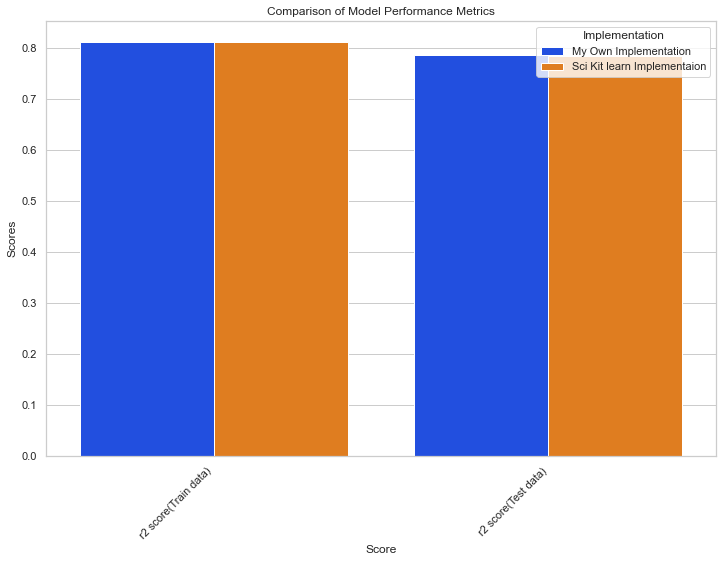

In [57]:

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df_2, x='Factor', y='Score', hue='Implementation')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Score")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance Metrics")
plt.legend(title="Implementation")
plt.show()

<AxesSubplot:xlabel='SKLearn Model prediction', ylabel='My Model Prediction'>

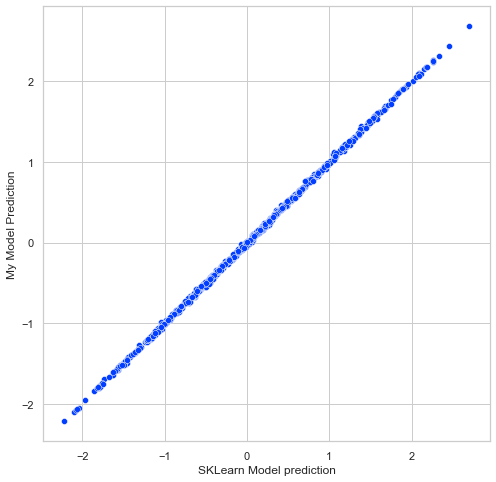

In [58]:
plot_data=pd.DataFrame({"SKLearn Model prediction":sklearn_model_prediction_train.squeeze(), "My Model Prediction":my_model_prediction_train.squeeze()})
sns.scatterplot(data=plot_data,x="SKLearn Model prediction",y="My Model Prediction")

[Text(0.5, 1.0, 'Predictions of my model vs sklearn using training data')]

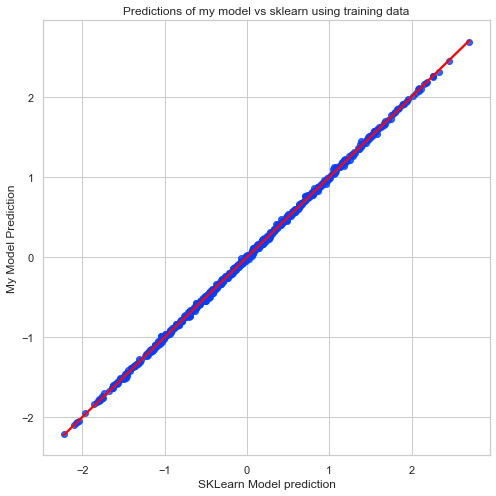

In [59]:
sns.regplot(data=plot_data,x="SKLearn Model prediction",y="My Model Prediction",line_kws={'color':'red'}).set(title='Predictions of my model vs sklearn using training data')

<AxesSubplot:xlabel='SKLearn Model prediction', ylabel='My Model Prediction'>

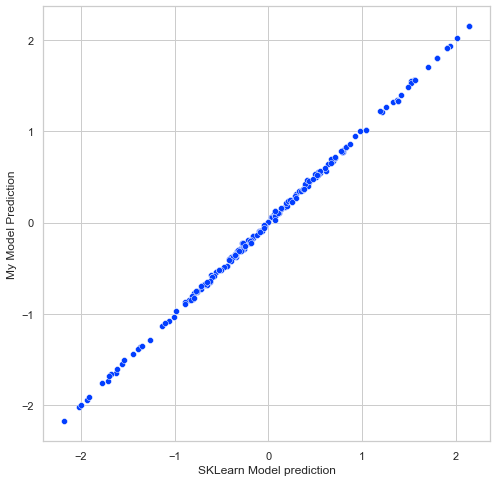

In [60]:
plot_data=pd.DataFrame({"SKLearn Model prediction":sklearn_model_prediction.squeeze(), "My Model Prediction":my_model_prediction.squeeze()})
sns.scatterplot(data=plot_data,x="SKLearn Model prediction",y="My Model Prediction")

[Text(0.5, 1.0, 'Predictions of my model vs sklearn using testing data')]

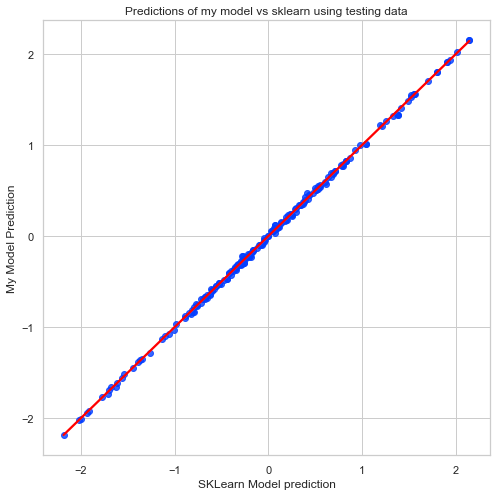

In [61]:
#sns.regplot(x="Strength", y=column[1], data=data, line_kws={'color': 'red'})
sns.regplot(data=plot_data,x="SKLearn Model prediction",y="My Model Prediction",line_kws={'color':'red'}).set(title='Predictions of my model vs sklearn using testing data')